## 1

给定摄像机的内参矩阵是

$\mathrm{K}=\left[\begin{array}{ccc}1200 & & 1760 \\ & 1200 & 1760 \\ & & 1\end{array}\right]$

给定摄像机的外参矩阵

$\mathrm{R}=\left[\begin{array}{ccc}-\frac{\sqrt{3}}{2} & \frac{1}{2} & 0 \\ & 0 & -1 \\ -\frac{1}{2} & -\frac{\sqrt{3}}{2} & 0\end{array}\right], \quad \mathrm{t}=\left[\begin{array}{c}5 \\ 5 \sqrt{3} \\ 0\end{array}\right]$

(1)、计算摄像机的透视投影矩阵 P

(2)、如果在摄像机前放置一个边长为 0.25m 的立方体，立方体的中心位于世界坐标系的原点，三个轴分别沿着世界坐标系的 X,Y,Z 方向，请问立方体 8 个 顶点的投影是多少;

(3)、绘制立方体和摄像机之间的相对位置关系;

(4)、请问摄像机的中心在世界坐标系中的坐标是多少;

(5)、请问世界坐标系的远点在摄像机坐标系中的坐标是多少;

(6)、请问世界坐标系的 x 轴在摄像机坐标系中的方向是多少;

(7)、请问摄像机坐标系的 y 轴在摄像机坐标系中的方向是多少.

In [27]:
# (1)

import numpy as np

K = np.asarray([[1200, 0, 1760],
                [0, 1200, 1760],
                [0, 0, 1]])
R = np.asarray([[-np.sin(np.pi / 3), np.sin(np.pi / 6), 0],
                [0, 0, -1],
                [-np.sin(np.pi / 6), -np.sin(np.pi / 3), 0]])
t = np.asarray([[5], [5 * np.sqrt(3)], [0]])

P = K.dot(np.hstack([R, t]))
print("P:\n",P)

P:
 [[-1.91923048e+03 -9.24204711e+02  0.00000000e+00  6.00000000e+03]
 [-8.80000000e+02 -1.52420471e+03 -1.20000000e+03  1.03923048e+04]
 [-5.00000000e-01 -8.66025404e-01  0.00000000e+00  0.00000000e+00]]


In [28]:
# (2)
counter = 1
for a in [0.125, -0.125]:
    for b in [0.125, -0.125]:
        for c in [0.125, -0.125]:
            real = np.asarray([[a], [b], [c], [1]])
            project = P.dot(real)
            print("{:<2}: ({}, {}, {}) -> ({},{})".format(counter, a, b, c, project[0]/project[2],project[1]/project[2]))
            counter += 1

1 : (0.125, 0.125, 0.125) -> ([-33056.89973239],[-58223.10026761])
2 : (0.125, 0.125, -0.125) -> ([-33056.89973239],[-59980.02220578])
3 : (0.125, -0.125, 0.125) -> ([128419.97779422],[225619.97779422])
4 : (0.125, -0.125, -0.125) -> ([128419.97779422],[232176.89973239])
5 : (-0.125, 0.125, 0.125) -> ([-133856.89973239],[-222099.97779422])
6 : (-0.125, 0.125, -0.125) -> ([-133856.89973239],[-228656.89973239])
7 : (-0.125, -0.125, 0.125) -> ([37219.97779422],[61743.10026761])
8 : (-0.125, -0.125, -0.125) -> ([37219.97779422],[63500.02220578])


camera position:
[[5.         8.66025404 0.        ]]
cameraDirection:
[[-0.3660254 -1.        -1.3660254]]


<ipython-input-43-c768d9c9484c>:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


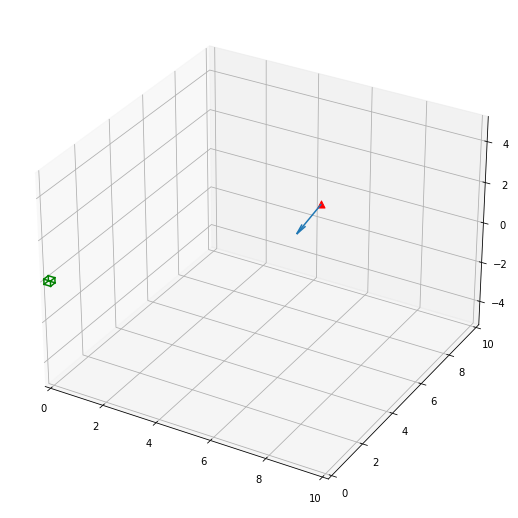

In [43]:
# (3)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from itertools import product, combinations

camera=np.asarray([[0],[0],[0],[1]])
cameraDirection=np.asarray([[1],[1],[1],[1]])

camera = np.hstack([R, t]).dot(camera)
cameraDirection = np.hstack([R, t]).dot(cameraDirection)
print("camera position:\n{}\ncameraDirection:\n{}".format(camera.T,cameraDirection.T-camera.T))

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
ax.set_aspect("auto")

ax.quiver(camera[0],camera[1],camera[2],cameraDirection[0]-camera[0],cameraDirection[1]-camera[1],cameraDirection[1]-camera[1])


h = [-0.125, 0.125]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.scatter(camera[0],camera[1],camera[2],color="r", s=50, marker='^')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(-5, 5)
plt.show()

In [45]:
#(4)

print("camera position:\n{}".format(camera.T))

camera position:
[[5.         8.66025404 0.        ]]


#(5)

$(\frac{29\sqrt{3}}{15},4/5,5\sqrt{3})$

In [72]:
cameraX = np.hstack([R, t]).dot(np.asarray([[1],[0],[0],[1]]))
cameraY = np.hstack([R, t]).dot(np.asarray([[0],[1],[0],[1]]))
print(cameraX-camera)
print(cameraY-camera)

[[-0.8660254]
 [ 0.       ]
 [-0.5      ]]
[[ 0.5      ]
 [ 0.       ]
 [-0.8660254]]
